# 코랩 한글 설치

In [108]:
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl
#그래프를 그리는 객체
import matplotlib.pyplot as plt



In [ ]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum
 



fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)


In [109]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

In [ ]:
#그래프 그림 (가로 5 세로5)
plt.figure(figsize=(5,5))
#X ,Y 좌표 설정
plt.plot([0,1], [0,1], label='한글테스트용')
#범례 표시
plt.legend()
#그래프 그림
plt.show()

# 정형 데이터

## 주택


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/dataset/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'
df_last = pd.read_csv(path, encoding="cp949")

In [ ]:
df_last["분양가격"]  = pd.to_numeric(df_last["분양가격(㎡)"], errors = 'coerce')
df_last = df_last.drop("분양가격(㎡)",axis =1)
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [ ]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","")
df_last["전용면적"] = df_last["전용면적"].str.strip()

In [ ]:
df_last.groupby(["지역명"]).mean() # 지역명으로 그룹화, 그룹끼리 평균
df_last.groupby(["지역명"])["평당분양가격"].mean()  # Series 형태
df_last.groupby(["지역명"])[["평당분양가격"]].mean() # DF형태
df_last.groupby(["지역명"]).mean()[["평당분양가격"]] # 위와 동일 

######################################################################
df_last.groupby(["지역명"]).mean()[["평당분양가격"]].sort_values(["평당분양가격"], ascending = False) # False : 내림차순 ,
# df_last.groupby(["전용면적"]).mean()
# df_last.groupby(["전용면적"])[["평당분양가격"]].mean().sort_values(["평당분양가격"], ascending = False).head(1)


In [ ]:
df_last

,지역명,규모구분,연도,월,분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡~85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡~102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882.0,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,60㎡이하
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898.0,12863.4,60㎡~85㎡이하
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,85㎡~102㎡이하


In [ ]:
df_last
df_last.groupby(["지역명","규모구분"]).mean()[["평당분양가격"]]


In [ ]:
전용면전_지역별_평당분양가격 = df_last.groupby(["전용면적","지역명"])[["평당분양가격"]].mean()
전용면전_지역별_평당분양가격

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [ ]:
전용면전_지역별_평당분양가격.xs("서울", level = "지역명")   
# 전용면전_지역별_평당분양가격.unstack()   # 표 모양 바꾸기


,평당분양가격
전용면적,
102㎡~,23446.038
60㎡~85㎡이하,22786.830
60㎡이하,23212.794
85㎡~102㎡이하,25943.874
전체,22610.346


In [ ]:
g = df_last.groupby(["연도", "지역명"])[["평당분양가격"]].mean()
g.unstack() # 줄이름 1은 그대로

In [ ]:
g.unstack().transpose()
# transpose - > 줄/칸 방향 바꾸기

In [ ]:
df_last.drop(["규모구분"], axis=1, inplace=True)

In [ ]:
g.T

## 범례 위치


https://dailyheumsi.tistory.com/97

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use("seaborn")

In [ ]:
dic1 = {
    "년" : [2017, 2018],
    "F" : [0.380887, 0.37],
    "M" : [0.619, 0.627]
}

df = pd.DataFrame(dic1)
df = df.set_index("년")

df.plot(kind="barh", title="남녀 비율")
plt.show()

df.plot(kind="barh", title="남녀 비율")
plt.legend(loc="center right")
plt.show()

df.plot(kind = "barh", title = "년도별 남녀 이용 비율")
plt.legend(bbox_to_anchor=(1.04, 0.5))
plt.show()

In [ ]:
pd.pivot_table(
    df_last,
    index = ["연도"],
    values = ['평당분양가격'],
    aggfunc = "mean"
)

,평당분양가격
연도,
2015,9202.735802
2016,9683.025000
2017,10360.487653
2018,10978.938411
2019,12188.293092


In [ ]:
sns.lineplot(
    data= df_last,
    x = '연도',
    y = '평당분양가격'
   
    )


sns.lineplot(
    data= df_last,
    x = '연도',
    y = '평당분양가격',
    hue ="지역명"
    )


In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df_last, x = '연도', y= '평당분양가격', hue ='지역명')
# hue : 그룹화

plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=5)

In [ ]:
df_last["연도"] == 2019  # 연도가 2019인지 아닌지 True , False 값 반환


df_last[df_last["연도"]== 2019]  # 2019년도 ,True 반환된 것들로 df_last 다시 만듬

# 2019년도 평당분양가격의 25센트에 해당하는 값 ,Q1
Q1 = df_last[df_last["연도"]== 2019]["평당분양가격"].quantile(0.25)
print("Q1 =")
print(Q1)
print("=================================")

# 2019년도 평당분양가격의 75센트에 해당하는 값 ,Q3
Q3 = df_last[df_last["연도"]== 2019]["평당분양가격"].quantile(0.75)
print("Q3 =")
print(Q3)
print("=================================")

IQR = Q3 - Q1
print("IQR = ")
print(IQR)
print("=================================")

outlier_min_limit = Q1 - (IQR *1.5)

print("outlier_min_limit = ")
print(outlier_min_limit)
print("=================================")

outlier_max_limit = Q3 + (IQR *1.5)

print("outlier_max_limit = ")
print(outlier_max_limit)
print("=================================")


# (df_last["연도"]==2019) & (df_last["평당분양가격"]<outlier_min_limit)

In [ ]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡이하
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡이하
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡이하
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡이하
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡이하
4333,제주,2019,12,NaN,NaN,85㎡~102㎡이하


In [ ]:
df_last.drop(["규모구분"], axis=1, inplace=True)

In [ ]:
df_last

In [ ]:
df_last[df_last["연도"]==2019 & (df_last["평당분양가격"] < outlier_min_limit)]

,지역명,연도,월,분양가격,평당분양가격,전용면적


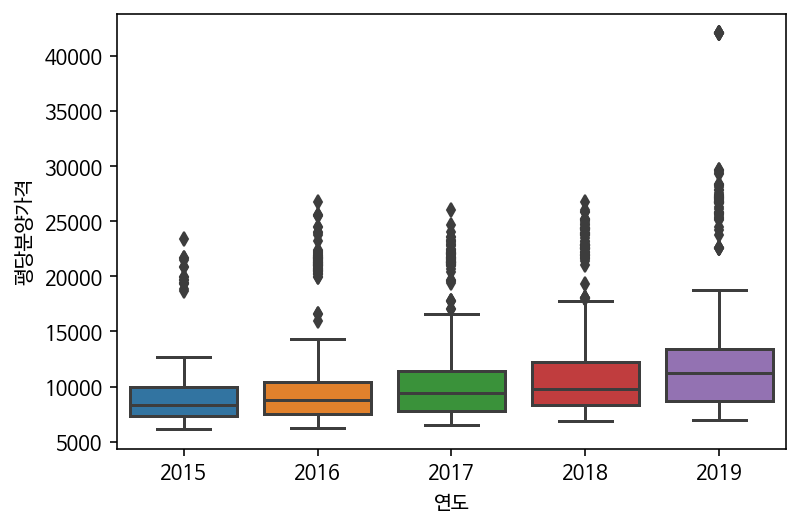

In [ ]:
df_last[ (df_last["연도"]==2019) & (df_last["평당분양가격"]<outlier_min_limit) ]

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

In [ ]:
(df_last["연도"] == 2019) & (df_last["평당분양가격"] > outlier_max_limit)

In [ ]:
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

In [ ]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

In [ ]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")
plt.legend(bbox_to_anchor=(1.05, 0.5))

In [ ]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")
plt.legend(bbox_to_anchor=(1.05, 0.5), borderaxespad=-3)

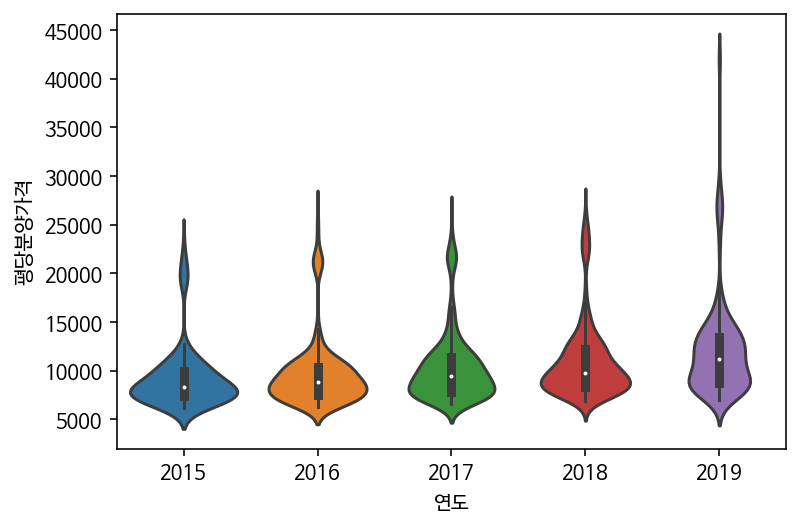

In [ ]:
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

# 중심선을 따라 대칭인 KDE 플롯이 있다. (KDE 플롯은 이전 포스팅 참고)
# 가운데 흰색 점은 중앙값(median)을 나타낸다.
# 바이올린 중앙의 두꺼운 선은 사분위 범위를 나타낸다.
# 바이올린 중앙의 얇은 선은 신뢰 구간을 나타낸다. 
# (bar plot과 마찬가지로 95% 신뢰 구간이 표시된다.)

In [ ]:
sns.barplot(data = df_last, x ="연도", y = "평당분양가격")

# 비정형 데이터

## 네이버 오픈 API

In [ ]:
import requests

#API 인증  정보
client_id = "udzt3jcCA8xTKi3UjGH_" 
client_secret = "HAk0g9n8cs"
url1 = "https://openapi.naver.com/v1/search/blog?query=강남역"

#header에  추가될  내용
key = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

result = requests.get(url1, headers = key)

In [ ]:
information = result.json()
information

In [37]:
inoformation["lastBuildDate"]
information["total"]
information["items"][0]
# information["items"][1]

{'bloggerlink': 'https://blog.naver.com/megkis',
 'bloggername': '헝클어진 마케팅, 문지기 블로그™',
 'description': '▶ 서울 강남구 강남대로78길 18 1층, 청담등심 <b>강남역</b> 4번 출구 쪽에 있는 먹자골목으로 들어가면 끝자락에 청담 등심이 위치해 있었어요. 청록색 외관에 간판이 반짝이고 있어서 초행길이었지만, 수월하게... ',
 'link': 'https://blog.naver.com/megkis?Redirect=Log&logNo=222430928640',
 'postdate': '20210714',
 'title': '특별했던 <b>강남역</b> 고기집'}

In [38]:
information["items"][1]

{'bloggerlink': 'https://blog.naver.com/unique1028',
 'bloggername': '줄리다이어리♥',
 'description': '얼마 전 친구들과 모임 중 강남 일대에서 꽤 알아준다는 <b>강남역</b> 고기집에 다녀왔어요. 화로에 구워 육질이 우수한 돈육에 수제냉면까지, 무엇하나 부족함이 없었던 곳이랍니다. 강남구 역삼동 619-14 1층 봉우화로... ',
 'link': 'https://blog.naver.com/unique1028?Redirect=Log&logNo=222411292448',
 'postdate': '20210626',
 'title': '재료가 좋은 삼겹살 <b>강남역</b> 고기집'}

In [53]:
def get_api_result(keyword, display, start):
  url="https://openapi.naver.com/v1/search/blog?query=" + keyword \
       +"&display="+str(display)\
       +"&start="+str(start)
  result = requests.get(url, headers=key)
  return result.json()

In [ ]:
get_api_result("동국대",10 ,1)

In [76]:
blog_title_list = []

def call_and_print(keyword, page):
  json_obj =  get_api_result(keyword, 20, (page-1)*20 +1)
  print("json_obj=", json_obj)
  if "items" in json_obj:
    for i in json_obj['items']:
      # print("item['title']=", i["title"])
      # print(i)

      title = i['title'].replace("<b>","").replace("</b>","")
      print("title = ", title,"@"+i["bloggername"]+"@"+i["link"])
      print("title =", title)

      global blog_title_list  

      blog_title_list.append(title)
  else:
    pass
  print("=" * 100)

In [ ]:
for page in range(1, 100):
  call_and_print("SK 인포섹", page)

In [ ]:
blog_title_list

## 트위터 라이브러리

In [ ]:
! pip install konlpy

In [85]:
import nltk
from konlpy.tag import Twitter

In [86]:
twitter = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
str1 = "아버지가 방에 들어가신다 그래서 슬펐다 슬프다 슬픔"
twitter.pos(str1, stem=True)
#  stem은 각 단어에서 어간을 추출

In [ ]:
for word, part in twitter.pos("아버지가 방에 들어가신다 그래서 슬펐다 슬프다 슬픔", stem=True):
  if part == "Josa":
    pass
  else:
    print(word)
    print(part)
  print("=" * 100)

In [98]:
word_list = []

for blog_title in blog_title_list:
  #print("blo_title = ", blog_title)
  
  for word,part in twitter.pos(blog_title):
    #print("word = ", word,"@part=", part)
    if part == "Punctuation":
      continue
    
    if part == "Number":
      continue
    
    if part == "Josa":
      continue
    
    if len(word) < 2:
      continue
    
    word_list.append(word)
  # print("=" * 100)

In [ ]:
word_list

In [ ]:
ko = nltk.Text(word_list)
ko.vocab()  # 단어당 출현 횟수
ko.vocab().most_common(100) # 젤 많이 나온 단어 100개

In [128]:
print(type(ko))

<class 'nltk.text.Text'>


In [ ]:
for i in ko:
  print(i)

In [106]:
from wordcloud import WordCloud
import matplotlib as plt

In [ ]:
dict(ko.vocab().most_common(100))

In [114]:
word_cloud = WordCloud(
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
).generate_from_frequencies(dict(ko.vocab().most_common(100)))

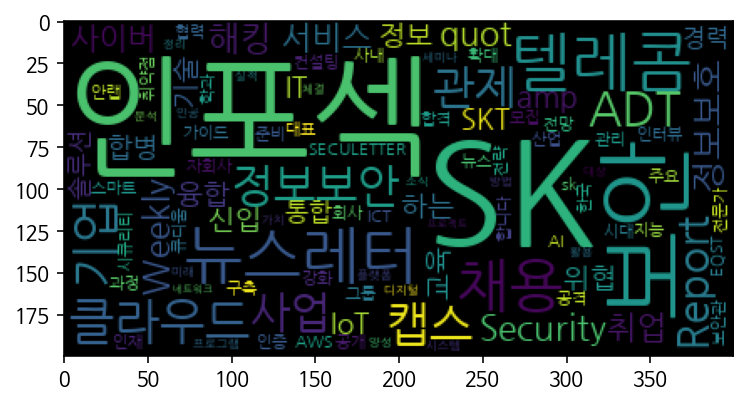

In [115]:
plt.imshow(word_cloud)

In [117]:
# 배경 바꾸기
word_cloud1 = WordCloud(
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    background_color = "white" # 배경색 화이트
).generate_from_frequencies(dict(ko.vocab().most_common(100)))

(-0.5, 399.5, 199.5, -0.5)

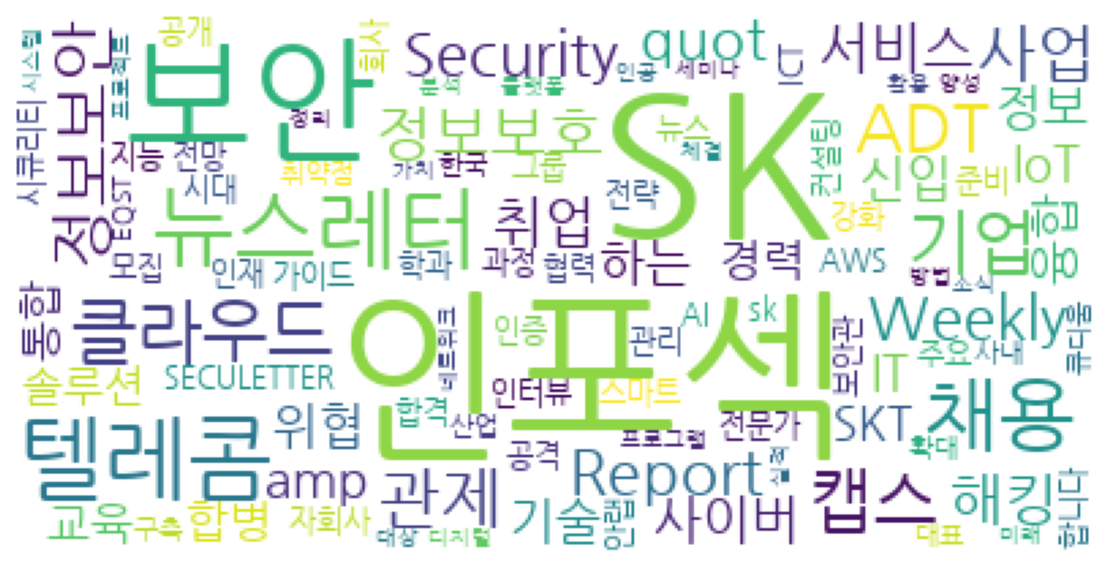

In [121]:
plt.figure(figsize=(10,5))
plt.imshow(word_cloud1)
plt.axis('off') # x,y 축 제거

# 실습

## 범례 위치

https://dailyheumsi.tistory.com/97
<범주박스 위치 조정>

In [ ]:
# 범주 박스 위치 조정
import pandas as pd

dic1 = {
    "년" : [2017, 2018],
    "F"  : [0.380887, 0.372857],
    "M"  : [0.619113, 0.627143]
}
df = pd.DataFrame(dic1)
print(df)
df = df.set_index("년")
df.plot(kind='barh', title="년도별 남녀 이용 비율")

df.plot(kind='barh', title="년도별 남녀 이용 비율")
plt.legend(loc ="center right")

df.plot(kind='barh', title="년도별 남녀 이용 비율")
plt.legend(loc = 7)

df.plot(kind='barh', title="년도별 남녀 이용 비율")
plt.legend(bbox_to_anchor=(1.05, 0.5), borderaxespad=0)
# borderaxespad : 범례와 그래프 사이 여백

df.plot(kind='barh', title="년도별 남녀 이용 비율")
plt.legend(bbox_to_anchor=(1.05, 0.5), borderaxespad=5)

df.plot(kind='barh', title="년도별 남녀 이용 비율")
plt.legend(bbox_to_anchor=(1.05, 0.5), borderaxespad=10)

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1),borderaxespad=0)

In [ ]:
# plot 종류
sns.boxplot(data = df_last, x="연도", y='평당분양가격')
plt.title("boxplot")
###################################################
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y = "평당분양가격", hue ="전용면적")
plt.title("boxplot ,,  hue = 전용면적")
###################################################
plt.figure(figsize=(12, 3))
sns.violinplot(data =df_last, x='연도' ,y ="평당분양가격")
plt.title("violinplot")
###################################################
plt.figure(figsize=(12, 3))
sns.barplot(data=df_last, x="연도", y="평당분양가격")
plt.title("barplot")

## 비정형 데이터 - 네이버 오픈 API

In [ ]:
import requests

#API 인증  정보
client_id = "udzt3jcCA8xTKi3UjGH_" 
client_secret = "HAk0g9n8cs"
url1 = "https://openapi.naver.com/v1/search/blog?query=강남역"

#header에  추가될  내용
key = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

result = requests.get(url1, headers = key)
information = result.json()

print("검색 일", information['lastBuildDate'])
print("총 검색 결과", information['total'])
print("시작 위치", information['start'])
print("출력 결과", information['display'])

In [162]:
blog_title_list = []
######################################################
def get_api_result(keyword, display, start):
  url="https://openapi.naver.com/v1/search/blog?query=" + keyword \
       +"&display="+str(display)\
       +"&start="+str(start)
  result = requests.get(url, headers=key)
  return result.json()
######################################################
def call_and_print(keyword, page):
  json_obj =  get_api_result(keyword, 20, (page-1)*20 +1)
  print("json_obj=", json_obj)
  if "items" in json_obj:
    for i in json_obj['items']:
      # print("item['title']=", i["title"])
      # print(i)

      title = i['title'].replace("<b>","").replace("</b>","")
      print("title = ", title,"@"+i["bloggername"]+"@"+i["link"])
      print("title =", title)

      global blog_title_list  

      blog_title_list.append(title)
  else:
    pass
  print("=" * 100)

In [ ]:
for page in range(1, 10):
  call_and_print("SK 인포섹", page)

In [ ]:
blog_title_list

## 자연어 처리 
 - nltk
 - wordcloud
 - Twitter
 

In [ ]:
!pip install konlpy

In [190]:
import nltk
from konlpy.tag import Twitter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [170]:
twitter = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
str1 = "아버지가 방에 들어가신다 그래서 슬펐다 슬프다 슬픔"
twitter.pos(str1, stem=True)
#  stem은 각 단어에서 어간을 추출

In [ ]:
# 조사 빼고 출력
for word, part in twitter.pos(str1, stem=True):
  if part == "Josa":
    pass
  else:
    print(word)
    print(part)
  print("=" * 100)

In [ ]:
word_list = []

for blog_title in blog_title_list:
  #print("blo_title = ", blog_title)
  
  for word,part in twitter.pos(blog_title):
    #print("word = ", word,"@part=", part)
    if part == "Punctuation":
      continue
    
    if part == "Number":
      continue
    
    if part == "Josa":
      continue
    
    if len(word) < 2:
      continue
    
    word_list.append(word)
  # print("=" * 100)
word_list

In [186]:
ko = nltk.Text(word_list)
ko.vocab()  # 단어당 출현 횟수
ko.vocab().most_common(100) # 젤 많이 나온 단어 100개
dict_ko = dict(ko.vocab().most_common(100)) 

(-0.5, 399.5, 199.5, -0.5)

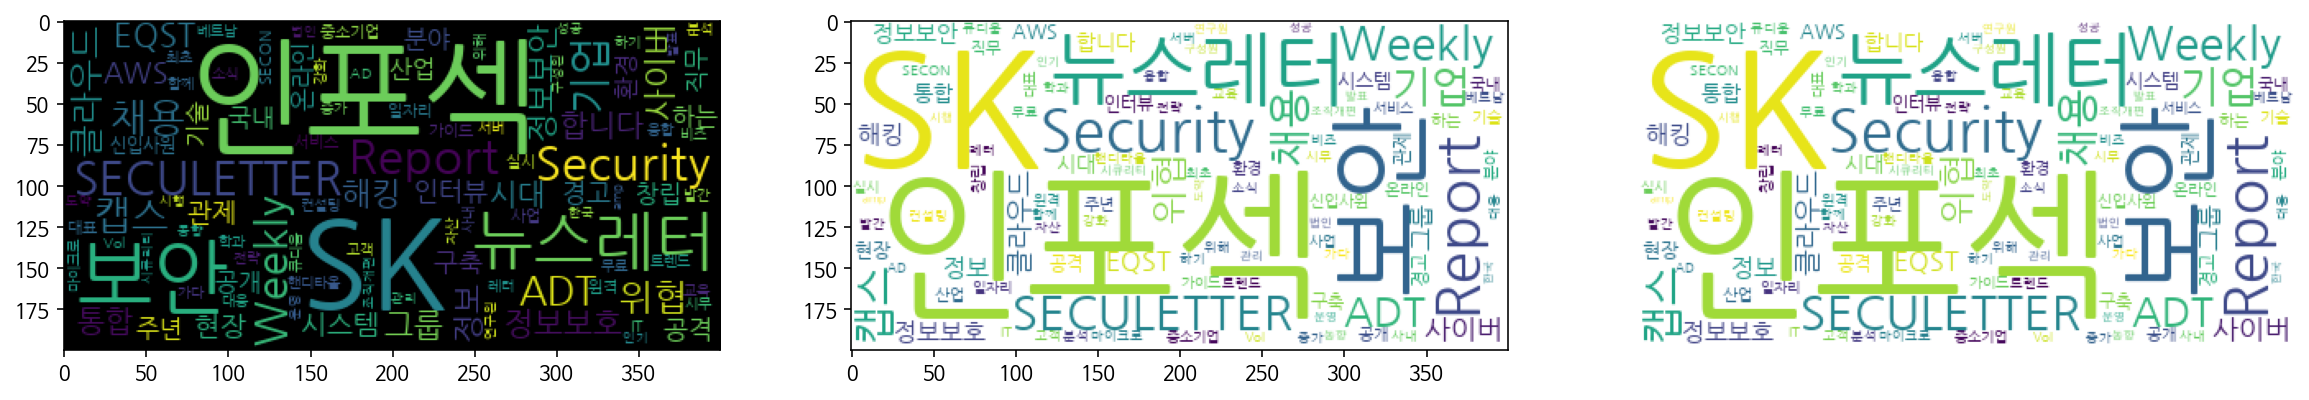

In [201]:
word_cloud1 = WordCloud(
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
).generate_from_frequencies(dict_ko)

# 배경 바꾸기
word_cloud2 = WordCloud(
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    background_color = "white" # 배경색 화이트
).generate_from_frequencies(dict_ko)

###################################
plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(word_cloud1)
###################################
plt.subplot(132)
plt.imshow(word_cloud2) 
###################################
plt.subplot(133)
plt.imshow(word_cloud2)
plt.axis('off') # x,y 축 제거